In [1]:
import pandas as pd
from datetime import datetime 

In [2]:
df_desla = pd.read_csv('TSLA_historical_data_date_only.csv')
df_desla.set_index('Date', inplace=True)
df_desla.index = pd.to_datetime(df_desla.index, dayfirst=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_6216\1812271356.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_desla.index = pd.to_datetime(df_desla.index, dayfirst=False)


In [3]:
df_desla.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-12-29,15.126667,15.194000,14.934667,15.047333,42037500,0,0
2014-12-30,14.932667,15.043333,14.760000,14.815333,43548000,0,0
2014-12-31,14.872667,15.045333,14.816667,14.827333,34462500,0,0
2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000,0,0
2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500,0,0


### Simple Moving Average

<Axes: xlabel='Date'>

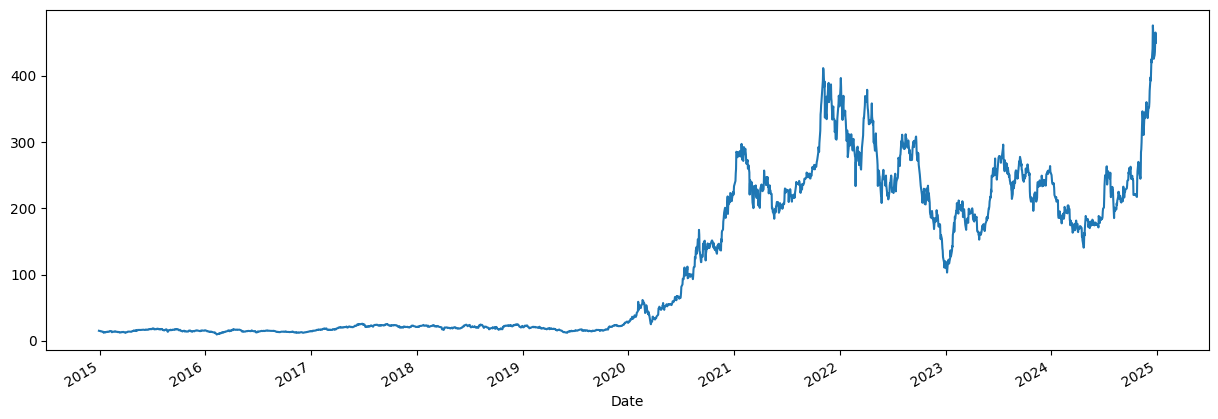

In [5]:
df_desla['Open'].plot(figsize=(15,5))

In [6]:
df_desla['Open 10 days rolling'] = df_desla['Open'].rolling(window=10, min_periods=1).mean()

<Axes: xlabel='Date'>

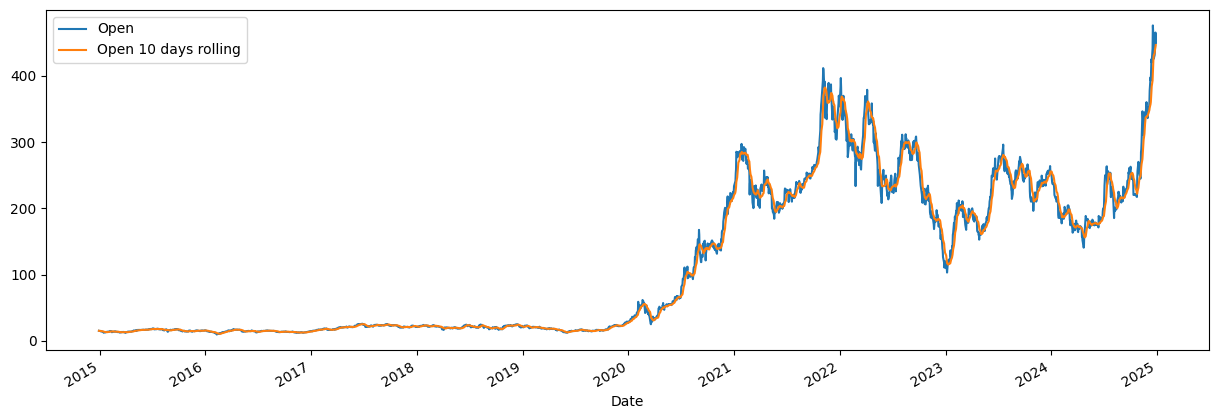

In [7]:
df_desla[['Open' , 'Open 10 days rolling']].plot(figsize=(15,5))

In [8]:
df_desla['Open 30 days rolling'] = df_desla['Open'].rolling(window=30, min_periods=1).mean()
df_desla['Open 50 days rolling'] = df_desla['Open'].rolling(window=50, min_periods=1).mean()

<Axes: xlabel='Date'>

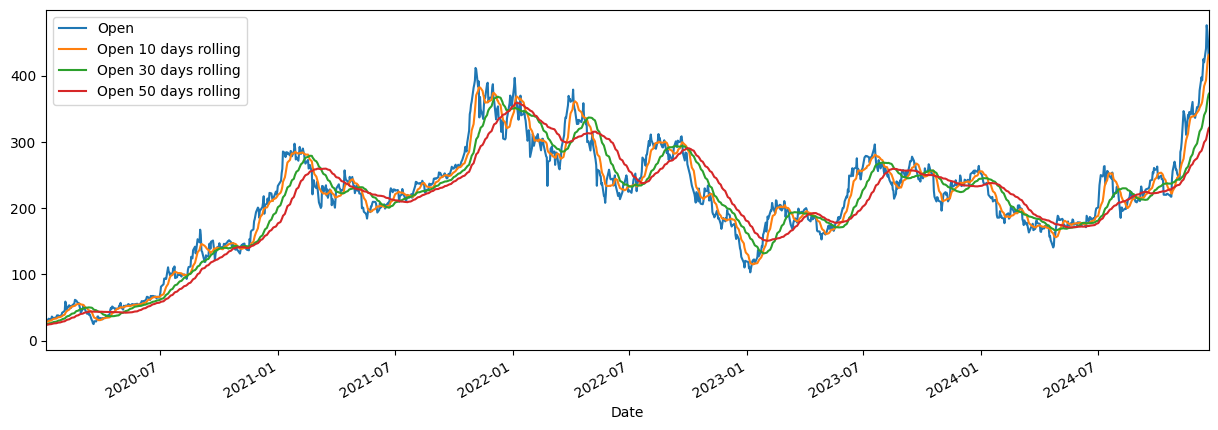

In [12]:
df_desla[['Open' , 'Open 10 days rolling' , 'Open 30 days rolling', 'Open 50 days rolling']].plot(xlim=['2020-01-05','2024-12-20'], 
                                                                                                  figsize=(15,5))

<Axes: xlabel='Date'>

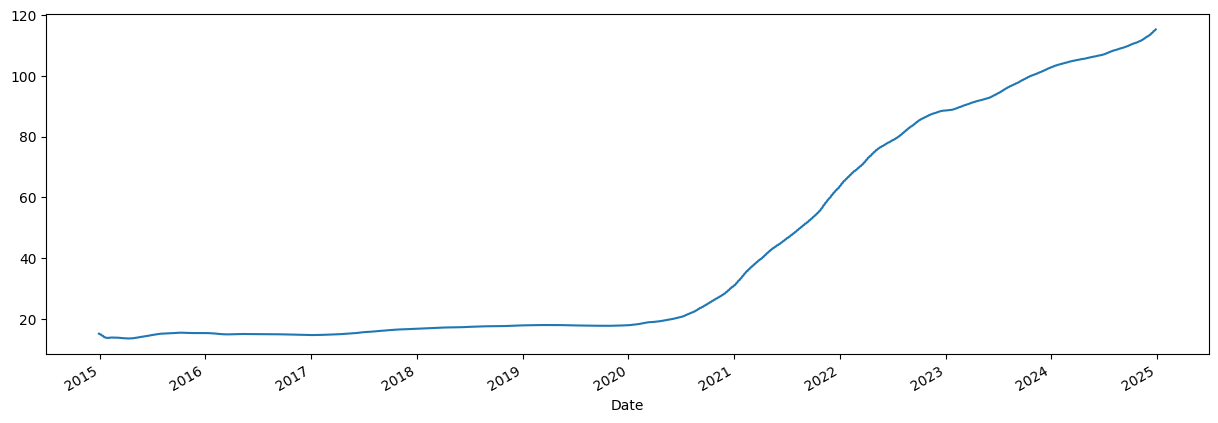

In [13]:
# Expanding
# CMA :- Cummulative Moving Average

df_desla['Open'].expanding().mean().plot(figsize=(15,5))

In [14]:
# EWMA - Exponential Moving Average
## EMA tesla sharesabs
# Lets smoothing factor - 0.1

df_desla['EMA_0.1'] = df_desla['Open'].ewm(alpha=0.1 , adjust=False).mean()

<Axes: xlabel='Date'>

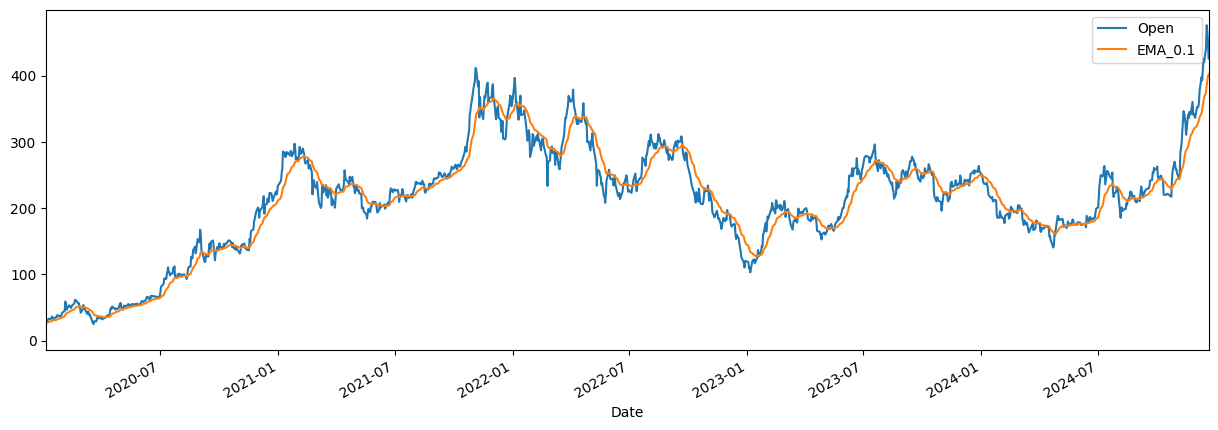

In [16]:
df_desla[['Open' ,'EMA_0.1']].plot(xlim=['2020-01-05','2024-12-20'],figsize=(15,5))

In [17]:
df_desla['EMA_0.3'] = df_desla['Open'].ewm(alpha=0.3 , adjust=False).mean()

<Axes: xlabel='Date'>

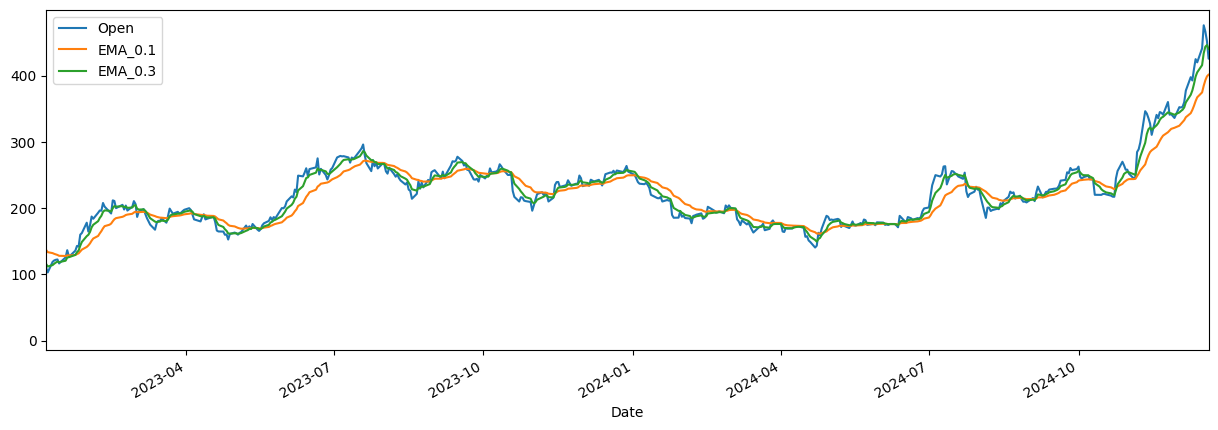

In [19]:
df_desla[['Open' ,'EMA_0.1', 'EMA_0.3']].plot(xlim=['2023-01-05','2024-12-20'],figsize=(15,5))